<img align="left" src = "images/linea.png" width=120 style="padding: 20px"> 
<img align="left" src = "images/rubin.png" width=180 style="padding: 20px"> 

# Photo-z Server - Tutorial Notebook

Contact author: [Julia Gschwend](mailto:julia@linea.org.br)

Last verified run: 2023-May-05<br>

<div id="notebook-contents" />

# Notebook contents

- PZ Server
    - [Introduction](#introduction) 
    - [How to upload a data product to the PZ Server](#how-to-upload-a-data-product-to-the-pz-server)
    - [How to download a data product from the PZ Server](#how-to-download-a-data-product-from-the-pz-server)
- PZ Server API (Python library pz-server-lib)
    - [How to get general info from PZ Server](#how-to-get-general-info-from-pz-server)
    - [How to display the metadata of a data product](#how-to-display-the-metadata-of-a-data-product)
    - [How to download data products as .zip files](#how-to-download-data-products-as-zip-files)  
    - [How to share data products with other RSP users](#how-to-share-data-products-with-other-rsp-users)
    - [How to retrieve contents of data products (work on memory)](#how-to-retrieve-contents-of-data-products-work-on-memory)
- Product types 
    - [Spec-z Catalogs](#spec-z-catalog)
    - [Training Sets](#training-sets)
    - [Photo-z Validation Results](#photo-z-validation-results)
    - [Photo-z Tables](#photo-z-tables)

# The PZ Server

<div id="introduction"></div>

## Introduction 


The Photo-z (PZ) Server is an online service available for the LSST Community to host and share lightweight photo-z related data products. The upload and download of data and metadata can be done at the website [pz-server.linea.org.br](https://pz-server.linea.org.br/) (during the development phase, a test environment is available at [pz-server-dev.linea.org.br](https://pz-server-dev.linea.org.br/)). There, you will find two separate pages containing a list of data products each: one for LSST Data Management's oficial data products, and other for user-generated data products. **The registered data products can also be accessed directly from Python code using the PZ Server's data access API, as demonstrated below.**

The PZ Server is developed and delivered as part of the in-kind contribution program BRA-LIN, from LIneA to the Rubin Observatory's LSST. The service is hosted in the Brazilian IDAC, not directly connected to the [Rubin Science Platform (RSP)](https://data.lsst.cloud/). However, it requires RSP credentials for user's authentication. For a comprehensive documentation about the PZ Server, please visit the [PZ Server's documentation page](https://linea-it.github.io/pz-lsst-inkind-doc/). There, you will find also an overview of all LIneA's contributions related to Photo-zs. The internal documentation of the API functions is available on the [API's documentation page](https://linea-it.github.io/pz-server-lib/html/index.html).  

<div style="text-align: right" id="how-to-upload-a-data-product-to-the-pz-server">

[back to the top](#notebook-contents)

</div>

## How to upload a data product to the PZ Server 

To upload a data product, click on the button **NEW PRODUCT** on the top left of the **User-generated Data Products** page and fill in the Upload Form with relevant metadata.

The photo-z-related products are organized into four categories (product types):

- **Spec-z Catalog:** Catalog of spectroscopic redshifts and positions (usually equatorial coordinates).
- **Training Set:** Training set for photo-z algorithms (tabular data). It usually contains magnitudes, errors, and true redshifts.
- **Photo-z Validation Results:** Results of a photo-z validation procedure (free format). Usually contains photo-z estimates (single estimates and/or pdf) of a validation set, photo-z validation metrics, validation plots, etc.
- **Photo-z Table:** Results of a photo-z estimation procedure. Ideally in the same format as the photo-z tables delivered by the DM as part of the LSST data releases. If the data is larger than the file upload limit (200MB), the product entry stores only the metadata (and instructions on accessing the data should be provided in the description field).

<div style="text-align: right">

[back to the top](#notebook-contents)

</div>

## How to download a data product from the PZ Server

To download a data product available on the Photo-z Server, go to one of the two pages by clicking on the card "LSST PZ Data Products" (for official products released by LSST DM Team) or "User-generated Data Products" (for products uploaded by the members of LSST community. The download button is on the left side of each data product (each row of the list). 

<div style="text-align: right" id="how-to-download-a-data-product-from-the-pz-server">

[back to the top](#notebook-contents)

</div>

# The PZ Server API (Python library pz-server-lib)

### Installation

**Using pip**

The PZ Server API is avalialble on **pip** as  `pzserver`. To install the API and its dependencies, type, on the Terminal:  

```
$ pip install pzserver 
``` 

**For developers**  

Alternatively, if you have cloned the repository with:

```
$ git clone https://github.com/linea-it/pzserver.git  
``` 

To install the API and its dependencies, type:

```
$ pip install -e .
$ pip install .[dev]
```


OBS: You might need to restart the kernel on the notebook to incorporate the new library.


### Imports and Setup

In [1]:
from pzserver import PzServer 
import matplotlib.pyplot as plt
%reload_ext autoreload 
%autoreload 2

The connection with the PZ Server from Python code is done by an object of the class `PzServer`. To get authorization to define an instance of `PzServer`, the users must provide an **API Token** generated on the top right menu on the [PZ Server website](https://pz-server.linea.org.br/) (during the development phase, on the [test environment](https://pz-server-dev.linea.org.br/)). 

<img src="images/ScreenShotTokenMenu.png" width=150pt align="top"/> <img src="images/ScreenShotTokenGenerator.png" width=300pt />

In [ ]:
pz_server = PzServer(token="<your token>", host="pz-dev") # "pz-dev" is the temporary host for test phase  

<div style="text-align: right" id="how-to-get-general-info-from-pz-server">

[back to the top](#notebook-contents)

</div>

## How to get general info from PZ Server

The object `pz_server` just created above can provide access to data and metadata stored in the PZ Server. It also brings useful methods for users to navigate through the available contents. The methods with the preffix `get_` return the result of a query on the PZ Server database as a Python dictionary, and are most useful to be used programatically (see detaials on the [API documentation page](https://linea-it.github.io/pz-server-lib/html/index.html)). Alternatively, those with the preffix `display_` show the results as a styled [_Pandas DataFrames_](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), optimized for Jupyter Notebook (note: column names might change in the display version). For instance:

Display the list of product types supported with a short description;

In [3]:
pz_server.display_product_types()

Product type,Description
Spec-z Catalog,Catalog of spectroscopic redshifts and positions (usually equatorial coordinates).
Training Set,"Training set for photo-z algorithms (tabular data). It usually contains magnitudes, errors, and true redshifts."
Validation Results,Results of a photo-z validation procedure (free format). Usually contains photo-z estimates (single estimates and/or pdf) of a validation set and photo-z validation metrics.
Photo-z Table,"Results of a photo-z estimation procedure. If the data is larger than the file upload limit (200MB), the product entry stores only the metadata (instructions on accessing the data should be provided in the description field."


Display the list of users who uploaded data products to the server;

In [4]:
pz_server.display_users()

GitHub username,name
crisingulani,Cristiano Singulani
drewoldag,Drew Oldag
glaubervila,Glauber Costa Vila-Verde
gschwend,Julia Gschwend
gverde,
singulani,


Display the list of data releases available at the time; 

In [5]:
pz_server.display_releases()

Release,Description
LSST DP0,LSST Data Preview 0


---

Display all data products available (WARNING: this list can rapdly grow during the survey's operation). 

In [6]:
pz_server.display_products_list() 

id,internal_name,product_name,product_type,release,uploaded_by,official_product,pz_code,description,created_at
14,14_gama_specz_subsample,GAMA spec-z subsample,Spec-z Catalog,None,gschwend,False,,A small subsample of the GAMA DR3 spec-z catalog (Baldry et al. 2018) as an example of a typical spec-z catalog from the literature.,2023-03-29T20:02:45.223568Z
13,13_vvds_specz_subsample,VVDS spec-z subsample,Spec-z Catalog,None,gschwend,False,,"A small subsample of the VVDS spec-z catalog (Le Fèvre et al. 2004, Garilli et al. 2008) as an example of a typical spec-z catalog from the literature.",2023-03-29T19:50:27.593735Z
12,12_goldenspike_knn,Goldenspike KNN,Validation Results,None,gschwend,False,KNN,Results of photoz validation using KNN on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.,2023-03-29T19:49:35.652295Z
11,11_goldenspike_flexzboost,Goldenspike FlexZBoost,Validation Results,None,gschwend,False,FlexZBoost,Results of photoz validation using FlexZBoost on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.,2023-03-29T19:48:34.864629Z
10,10_goldenspike_bpz,Goldenspike BPZ,Validation Results,LSST DP0,gschwend,False,BPZ,Results of photoz validation using BPZ on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.,2023-03-29T19:42:04.424990Z
9,9_goldenspike_train_data_hdf5,Goldenspike train data hdf5,Training Set,None,gschwend,False,,A mock training set created using the example notebook goldenspike.ipynb available in RAIL's repository. Test upload of files in hdf5 format.,2023-03-29T19:12:59.746096Z
8,8_goldenspike_train_data_fits,Goldenspike train data fits,Training Set,None,gschwend,False,,A mock training set created using the example notebook goldenspike.ipynb available in RAIL's repository. Test upload of files in fits format.,2023-03-29T19:09:12.958883Z
7,7_goldenspike_train_data_parquet,Goldenspike train data parquet,Training Set,None,gschwend,False,,A mock training set created using the example notebook goldenspike.ipynb available in RAIL's repository. Test upload of files in parquet format.,2023-03-29T19:06:58.473920Z
6,6_simple_training_set,Simple training set,Training Set,LSST DP0,gschwend,False,,"A simple example training set created based on the Jupyter notebook simple_pz_training_set.ipynb created by Melissa Graham, available in the repository delegate-contributions-dp02. The file contains coordinates, redshifts, magnitudes, and errors, as an illustration of a typical training set for photo-z algorithms.",2023-03-23T19:46:48.807872Z
1,1_simple_true_z_catalog,Simple true z catalog,Spec-z Catalog,None,gschwend,False,,"A simple example of a spectroscopic (true) redshifts catalog created based on the Jupyter notebook simple_pz_training_set.ipynb created by Melissa Graham, available in the repository delegate-contributions-dp02. The file contains only coordinates and redshifts, as an illustration of a typical spec-z catalog.",2023-03-23T13:19:32.050795Z


The information about product type, users, and releases shown above can be used to filter the data products of interest for your search. For that, the method `list_products` receives as argument a dictionary mapping the products attributes to their values. 

In [7]:
pz_server.display_products_list(filters={"release": "LSST DP0", 
                                 "product_type": "Training Set"})

id,internal_name,product_name,product_type,release,uploaded_by,official_product,pz_code,description,created_at
6,6_simple_training_set,Simple training set,Training Set,LSST DP0,gschwend,False,,"A simple example training set created based on the Jupyter notebook simple_pz_training_set.ipynb created by Melissa Graham, available in the repository delegate-contributions-dp02. The file contains coordinates, redshifts, magnitudes, and errors, as an illustration of a typical training set for photo-z algorithms.",2023-03-23T19:46:48.807872Z


It also works if we type a string pattern that is part of the value. For instance, just "DP0" instead of "LSST DP0": 

In [8]:
pz_server.display_products_list(filters={"release": "DP0"})

id,internal_name,product_name,product_type,release,uploaded_by,official_product,pz_code,description,created_at
10,10_goldenspike_bpz,Goldenspike BPZ,Validation Results,LSST DP0,gschwend,False,BPZ,Results of photoz validation using BPZ on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.,2023-03-29T19:42:04.424990Z
6,6_simple_training_set,Simple training set,Training Set,LSST DP0,gschwend,False,,"A simple example training set created based on the Jupyter notebook simple_pz_training_set.ipynb created by Melissa Graham, available in the repository delegate-contributions-dp02. The file contains coordinates, redshifts, magnitudes, and errors, as an illustration of a typical training set for photo-z algorithms.",2023-03-23T19:46:48.807872Z


It also allows the search for multiple strings by adding the suffix `__or` (two underscores + "or") to the search key. For instance, to get spec-z catalogs and training sets in the same search (notice that filtering is not case sensitive):

In [9]:
pz_server.display_products_list(filters={"product_type__or": ["Spec-z Catalog", "training set"]})

id,internal_name,product_name,product_type,release,uploaded_by,official_product,pz_code,description,created_at
14,14_gama_specz_subsample,GAMA spec-z subsample,Spec-z Catalog,None,gschwend,False,,A small subsample of the GAMA DR3 spec-z catalog (Baldry et al. 2018) as an example of a typical spec-z catalog from the literature.,2023-03-29T20:02:45.223568Z
13,13_vvds_specz_subsample,VVDS spec-z subsample,Spec-z Catalog,None,gschwend,False,,"A small subsample of the VVDS spec-z catalog (Le Fèvre et al. 2004, Garilli et al. 2008) as an example of a typical spec-z catalog from the literature.",2023-03-29T19:50:27.593735Z
9,9_goldenspike_train_data_hdf5,Goldenspike train data hdf5,Training Set,None,gschwend,False,,A mock training set created using the example notebook goldenspike.ipynb available in RAIL's repository. Test upload of files in hdf5 format.,2023-03-29T19:12:59.746096Z
8,8_goldenspike_train_data_fits,Goldenspike train data fits,Training Set,None,gschwend,False,,A mock training set created using the example notebook goldenspike.ipynb available in RAIL's repository. Test upload of files in fits format.,2023-03-29T19:09:12.958883Z
7,7_goldenspike_train_data_parquet,Goldenspike train data parquet,Training Set,None,gschwend,False,,A mock training set created using the example notebook goldenspike.ipynb available in RAIL's repository. Test upload of files in parquet format.,2023-03-29T19:06:58.473920Z
6,6_simple_training_set,Simple training set,Training Set,LSST DP0,gschwend,False,,"A simple example training set created based on the Jupyter notebook simple_pz_training_set.ipynb created by Melissa Graham, available in the repository delegate-contributions-dp02. The file contains coordinates, redshifts, magnitudes, and errors, as an illustration of a typical training set for photo-z algorithms.",2023-03-23T19:46:48.807872Z
1,1_simple_true_z_catalog,Simple true z catalog,Spec-z Catalog,None,gschwend,False,,"A simple example of a spectroscopic (true) redshifts catalog created based on the Jupyter notebook simple_pz_training_set.ipynb created by Melissa Graham, available in the repository delegate-contributions-dp02. The file contains only coordinates and redshifts, as an illustration of a typical spec-z catalog.",2023-03-23T13:19:32.050795Z


To fetch the results of a search and attribute to a variable, just change the preffix `display_` by `get_`, like this:  

In [10]:
search_results = pz_server.get_products_list(filters={"product_type": "results"}) # PZ Validation results
search_results

[{'id': 12,
  'release': None,
  'release_name': None,
  'product_type': 3,
  'product_type_name': 'Validation Results',
  'uploaded_by': 'gschwend',
  'is_owner': False,
  'internal_name': '12_goldenspike_knn',
  'display_name': 'Goldenspike KNN',
  'official_product': False,
  'pz_code': 'KNN',
  'description': "Results of photoz validation using KNN on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.",
  'created_at': '2023-03-29T19:49:35.652295Z',
  'status': 1},
 {'id': 11,
  'release': None,
  'release_name': None,
  'product_type': 3,
  'product_type_name': 'Validation Results',
  'uploaded_by': 'gschwend',
  'is_owner': False,
  'internal_name': '11_goldenspike_flexzboost',
  'display_name': 'Goldenspike FlexZBoost',
  'official_product': False,
  'pz_code': 'FlexZBoost',
  'description': "Results of photoz validation using FlexZBoost on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.",
  'cr

<div style="text-align: right" id="how-to-display-the-metadata-of-a-data-product">

[back to the top](#notebook-contents)

</div>

## How to display the metadata of a data product    

The metadata of a given data product is the information provided by the user on the upload form. This information is attached to the data product contents and is available for consulting on the PZ Server page or using this Python API (`pz-server-lib`).

All data products stored on PZ Server are identified by a unique **id** number or an unique name, a _string_ called **internal_name**, which is created automatically at the moment of the upload by concatenating the product **id** to the name given by its owner (replacing blank spaces by "_", lowering cases, and removing special characters). 

The `PzServer`'s method `get_product_metadata()` returns a dictionary with the attibutes stored in the PZ Server about a given data product identified by its **id** or **internal_name**. For use in a Jupyter notebook, the equivalent `display_product_metadata()` shows the results in a formated table.

In [11]:
# pz_server.display_product_metadata(<id (int or str) or internal_name (str)>) 
# pz_server.display_product_metadata(6) 
# pz_server.display_product_metadata("6") 
pz_server.display_product_metadata("6_simple_training_set") 

key,value
id,6
release,LSST DP0
product_type,Training Set
uploaded_by,gschwend
internal_name,6_simple_training_set
product_name,Simple training set
official_product,False
pz_code,
description,"A simple example training set created based on the Jupyter notebook simple_pz_training_set.ipynb created by Melissa Graham, available in the repository delegate-contributions-dp02. The file contains coordinates, redshifts, magnitudes, and errors, as an illustration of a typical training set for photo-z algorithms."
created_at,2023-03-23T19:46:48.807872Z


<div style="text-align: right" id="how-to-download-data-products-as-zip-files">

[back to the top](#notebook-contents)

</div>

## How to download data products as .zip files   

To download any data product stored in the PZ Server, use the `PzServer`'s method `download_product` informing the product's **internal_name** and the path to where it will be saved (the default is the current folder). This method downloads a compressed .zip file which contais all the files uploaded by the user, including data, anciliary files and description files. The time spent to download a data product depends on the internet connections between the user and the host. Let's try it with a small data product. 

In [12]:
pz_server.download_product(14, save_in=".")

Connecting to PZ Server...
File saved as: ./14_gama_specz_subsample_f15c0.zip
Done!


<div style="text-align: right" id="how-to-share-data-products-with-other-rsp-users">

[back to the top](#notebook-contents)

</div>

## How to share data products with other RSP users

All data products uploaded to the PZ Server are imediately available and visible to all PZ Server users (people with RSP credentials) through the PZ Server website or via the API. Besides informing the product **id** or **internal_name** for programatic access, another way to share a data product is providing the product's URL, which leads to the product's download page. The URL is composed by the PZ Server website address + **/products/** + **internal_name**:

https://pz-server.linea.org.br/product/ + **internal_name** 

or, if still in the development phase, 

https://pz-server-dev.linea.org.br/product/ + **internal_name**


For example: 

https://pz-server-dev.linea.org.br/product/6_simple_training_set

<font color=red> WARNING:</font> The URL works only with the internal name, **not** with the **id** number. 


<div style="text-align: right" id="how-to-retrieve-contents-of-data-products-work-on-memory">

[back to the top](#notebook-contents)

</div>

## How to retrieve contents of data products (work on memory)

Another feature of the PZ Server API is to let users retrieve the contents of a given data product to work on memory (by atributing the results of the method `get_product()` to a variable in the code). This feature is available only for tabular data (product types: **Spec-z Catalog** and **Training Set**). 

By default, the method `get_product` returns an object from a particular class, depending on the product's type. The classes `SpeczCatalog` and `TrainingSet` are simple extensions of `pandas.DataFrame` (via class composition) with a couple of additional attributes and methods, such as the attribute `metadata`, and the method `display_metadata()`. Let's see an example: 

In [13]:
catalog = pz_server.get_product(8)
catalog

Connecting to PZ Server...
Done!


In [14]:
catalog.display_metadata()

key,value
id,8
release,None
product_type,Training Set
uploaded_by,gschwend
internal_name,8_goldenspike_train_data_fits
product_name,Goldenspike train data fits
official_product,False
pz_code,
description,A mock training set created using the example notebook goldenspike.ipynb available in RAIL's repository. Test upload of files in fits format.
created_at,2023-03-29T19:09:12.958883Z


The tabular data is alocated in the attribute `data`, which is a `pandas.DataFrame`. 

In [15]:
catalog.data

,redshift,mag_u_lsst,mag_err_u_lsst,mag_g_lsst,mag_err_g_lsst,mag_r_lsst,mag_err_r_lsst,mag_i_lsst,mag_err_i_lsst,mag_z_lsst,mag_err_z_lsst,mag_y_lsst,mag_err_y_lsst
0,0.769521,26.496852,0.288986,25.863170,0.056997,24.729555,0.020702,23.610683,0.012011,23.143518,0.013714,22.915156,0.024561
1,1.088857,26.258727,0.237964,25.509524,0.041668,24.469344,0.016648,23.532860,0.011344,22.546680,0.008992,22.070255,0.012282
2,1.333098,25.373855,0.112257,24.943293,0.025359,24.524998,0.017431,24.013649,0.016486,23.733274,0.022315,23.102123,0.028906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.986374,26.050653,0.200164,25.641624,0.046837,25.161078,0.030090,24.460152,0.024047,23.977239,0.027567,23.831974,0.055121
60,0.474281,27.048056,0.444683,26.428211,0.093854,24.839984,0.022755,24.209226,0.019403,23.855082,0.024787,23.507456,0.041329
61,0.561923,24.680480,0.061182,23.958609,0.011430,22.900135,0.006346,22.143581,0.005820,21.867563,0.006465,21.612692,0.008967


In [16]:
type(catalog.data)

pandas.core.frame.DataFrame

It preserves the useful methods from `pandas.DataFrame`, such as:  

In [17]:
catalog.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   redshift        62 non-null     >f8  
 1   mag_u_lsst      61 non-null     >f8  
 2   mag_err_u_lsst  61 non-null     >f8  
 3   mag_g_lsst      62 non-null     >f8  
 4   mag_err_g_lsst  62 non-null     >f8  
 5   mag_r_lsst      62 non-null     >f8  
 6   mag_err_r_lsst  62 non-null     >f8  
 7   mag_i_lsst      62 non-null     >f8  
 8   mag_err_i_lsst  62 non-null     >f8  
 9   mag_z_lsst      62 non-null     >f8  
 10  mag_err_z_lsst  62 non-null     >f8  
 11  mag_y_lsst      61 non-null     >f8  
 12  mag_err_y_lsst  61 non-null     >f8  
dtypes: float64(13)
memory usage: 6.4 KB


In [18]:
catalog.data.describe()

,redshift,mag_u_lsst,mag_err_u_lsst,mag_g_lsst,mag_err_g_lsst,mag_r_lsst,mag_err_r_lsst,mag_i_lsst,mag_err_i_lsst,mag_z_lsst,mag_err_z_lsst,mag_y_lsst,mag_err_y_lsst
count,62.000000,61.000000,61.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,61.000000,61.000000
mean,0.780298,25.446008,0.188050,24.820000,0.038182,24.003970,0.018770,23.384804,0.016165,23.074481,0.021478,22.932354,0.054682
std,0.355365,1.269277,0.193747,1.314112,0.036398,1.387358,0.013750,1.381587,0.010069,1.400673,0.014961,1.540284,0.115875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,0.764600,25.577029,0.133815,25.069970,0.028309,24.470215,0.016660,23.748506,0.013390,23.514185,0.018540,23.293384,0.034199
75%,0.948494,26.263284,0.238859,25.705486,0.049576,24.985225,0.025802,24.488654,0.024650,24.165944,0.032557,23.993010,0.063585
max,1.755764,28.482391,1.154073,27.296152,0.198195,26.036958,0.065360,24.949645,0.036932,24.693132,0.051883,27.342151,0.909230


In the prod-types you will see more details about these specific classes. For those who prefer working with `astropy.Table` or pure `pandas.DataFrame`, the method `get_product()` gives the flexibility to choose the output format (`fmt="pandas"` or `fmt="astropy"`).     

In [19]:
dataframe = pz_server.get_product(8, fmt="pandas")
print(type(dataframe))
dataframe

Connecting to PZ Server...
<class 'pandas.core.frame.DataFrame'>


,redshift,mag_u_lsst,mag_err_u_lsst,mag_g_lsst,mag_err_g_lsst,mag_r_lsst,mag_err_r_lsst,mag_i_lsst,mag_err_i_lsst,mag_z_lsst,mag_err_z_lsst,mag_y_lsst,mag_err_y_lsst
0,0.769521,26.496852,0.288986,25.863170,0.056997,24.729555,0.020702,23.610683,0.012011,23.143518,0.013714,22.915156,0.024561
1,1.088857,26.258727,0.237964,25.509524,0.041668,24.469344,0.016648,23.532860,0.011344,22.546680,0.008992,22.070255,0.012282
2,1.333098,25.373855,0.112257,24.943293,0.025359,24.524998,0.017431,24.013649,0.016486,23.733274,0.022315,23.102123,0.028906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.986374,26.050653,0.200164,25.641624,0.046837,25.161078,0.030090,24.460152,0.024047,23.977239,0.027567,23.831974,0.055121
60,0.474281,27.048056,0.444683,26.428211,0.093854,24.839984,0.022755,24.209226,0.019403,23.855082,0.024787,23.507456,0.041329
61,0.561923,24.680480,0.061182,23.958609,0.011430,22.900135,0.006346,22.143581,0.005820,21.867563,0.006465,21.612692,0.008967


In [20]:
table = pz_server.get_product(8, fmt="astropy")
print(type(table))
table

Connecting to PZ Server...
<class 'astropy.table.table.Table'>


redshift,mag_u_lsst,mag_err_u_lsst,mag_g_lsst,mag_err_g_lsst,mag_r_lsst,mag_err_r_lsst,mag_i_lsst,mag_err_i_lsst,mag_z_lsst,mag_err_z_lsst,mag_y_lsst,mag_err_y_lsst
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.7695210576057434,26.49685173335998,0.28898640164514966,25.863170180148593,0.0569968492513252,24.72955523266535,0.020702469899475762,23.610683261247523,0.012011391457007867,23.14351797933142,0.013714272888189844,22.915156068508104,0.02456124411372624
...,...,...,...,...,...,...,...,...,...,...,...,...
0.4742807149887085,27.048056087407986,0.4446825063577354,26.428211280519175,0.09385433945963481,24.83998360318214,0.02275493531289512,24.2092260174936,0.01940261275081239,23.855082243159934,0.02478730171099941,23.507455929574288,0.041328512368478044
0.5619226694107056,24.680479530543163,0.061181531929665633,23.958608997973702,0.01142956636817526,22.900134967933102,0.006345869773581998,22.143580633270624,0.005819630970810428,21.867562849329406,0.006465480863342269,21.61269159453626,0.008966510628950788


--- 
Clean up

In [21]:
del search_results, catalog, dataframe, table 

--- 

<div style="text-align: right">

[back to the top](#notebook-contents)

</div>

# Product types 

The PZ Server API provides Python classes with useful methods to handle particular product types. Let's recap the product types available:   

In [22]:
pz_server.display_product_types()

Product type,Description
Spec-z Catalog,Catalog of spectroscopic redshifts and positions (usually equatorial coordinates).
Training Set,"Training set for photo-z algorithms (tabular data). It usually contains magnitudes, errors, and true redshifts."
Validation Results,Results of a photo-z validation procedure (free format). Usually contains photo-z estimates (single estimates and/or pdf) of a validation set and photo-z validation metrics.
Photo-z Table,"Results of a photo-z estimation procedure. If the data is larger than the file upload limit (200MB), the product entry stores only the metadata (instructions on accessing the data should be provided in the description field."


<div style="text-align: right" id="spec-z-catalog">

[back to the top](#notebook-contents)

</div>

## Spec-z Catalog 

In the context of the PZ Server, Spec-z Catalogs are defined as any catalog containing spherical equatorial coordinates and spectroscopic redshift measurements (or, analogously, true redshifts from simulations). A Spec-z Catalog can include data from a single spectroscopic survey or a combination of data from several sources. To be considered as a single Spec-z Catalog, the data should be provided as a single file to PZ Server's the upload tool. For multi-survey catalogs, it is recommended to add the survey name or identification as an extra column. 


Mandatory columns: 
* Right ascension [degrees] - `float`
* Declination [degrees] - `float`
* Spectroscopic or true redshift - `float`

Recommended columns: 
* Spectroscopic redshift error - `float`
* Quality flag - `integer`, `float`, or `string`
* Survey name (recommended for compilations of data from different surveys)


Let's see an example of Spec-z Catalog: 

In [23]:
gama = pz_server.get_product(14)

Connecting to PZ Server...
Done!


In [24]:
gama.display_metadata()

key,value
id,14
release,None
product_type,Spec-z Catalog
uploaded_by,gschwend
internal_name,14_gama_specz_subsample
product_name,GAMA spec-z subsample
official_product,False
pz_code,
description,A small subsample of the GAMA DR3 spec-z catalog (Baldry et al. 2018) as an example of a typical spec-z catalog from the literature.
created_at,2023-03-29T20:02:45.223568Z


Display basic statistics

In [25]:
gama.data.describe()

,ID,RA,DEC,Z,ERR_Z,FLAG_DES
count,2.576000e+03,2576.000000,2576.000000,2576.000000,2576.0,2576.000000
mean,1.105526e+06,154.526343,-1.101865,0.224811,99.0,3.949534
std,4.006668e+04,70.783868,2.995036,0.102571,0.0,0.218947
...,...,...,...,...,...,...
50%,1.103558e+06,180.140145,-0.480830,0.217804,99.0,4.000000
75%,1.140619e+06,215.836583,1.170363,0.291810,99.0,4.000000
max,1.176440e+06,223.497080,2.998180,0.728717,99.0,4.000000


The spec-z catalog object has a very basic plot method for quick visualization of catalog properties 

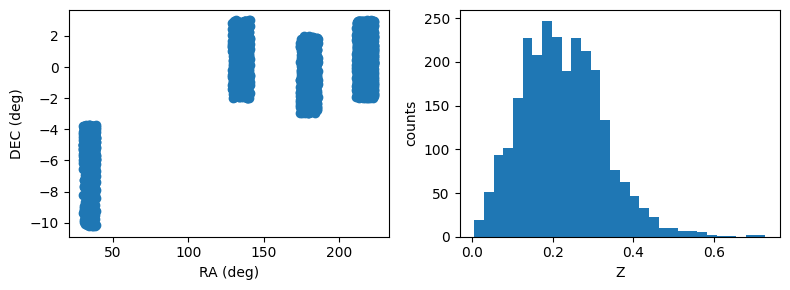

In [26]:
gama.plot()

The attribute `data`, which is a `DataFrame` preserves the `plot` method from Pandas.   

<Axes: xlabel='RA', ylabel='DEC'>

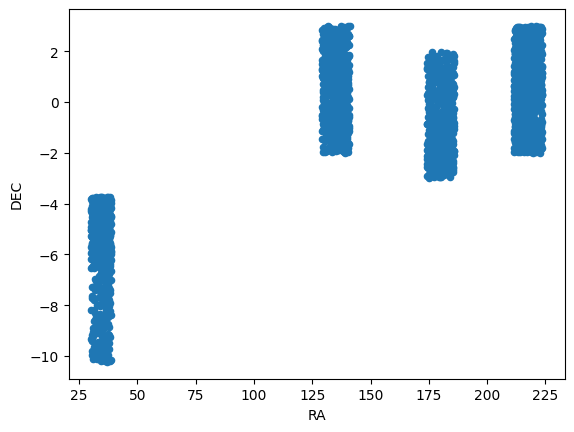

In [27]:
gama.data.plot(x="RA", y="DEC", kind="scatter")  

<div style="text-align: right" id="training-sets">

[back to the top](#notebook-contents)

</div>

## Training Sets 
    
In the context of the PZ Server, Training Sets are defined as the product of matching (spatially) a given Spec-z Catalog (single survey or compilation) to the photometric data, in this case, the LSST Objects Catalog. The PZ Server API offers a tool called _Training Set Maker_ for users to build customized Training Sets based on the Spec-z Catalogs available. Please see the companion Jupyter Notebook `pz_tsm_tutorial.ipynb` for details.   


_Note 1: Commonly the training set is split into two or more subsets for photo-z validation purposes. If the Training Set owner has previously defined which objects should belong to each subset (trainining and validation/test sets), this information must be available as an extra column in the table or as clear instructions for reproducing the subsets separation in the data product description._

  
_Note 2: The PZ Server only supports catalog-level Training Sets. Image-based Training Sets, e.g., for deep-learning algorithms, are not supported yet._


Mandatory column: 
* Spectroscopic (or true) redshift - `float`

Other expected columns
* Object ID from LSST Objects Catalog - `integer`
* Observables: magnitudes (and/or colors, or fluxes) from LSST Objects Catalog - `float`
* Observable errors: magnitude errors (and/or color errors, or flux errors) from LSST Objects Catalog - `float`
* Right ascension [degrees] - `float`
* Declination [degrees] - `float`
* Quality Flag - `integer`, `float`, or `string`
* Subset Flag - `integer`, `float`, or `string`



In [28]:
train_goldenspike = pz_server.get_product(9)

Connecting to PZ Server...
Done!


In [29]:
train_goldenspike.display_metadata()

key,value
id,9
release,None
product_type,Training Set
uploaded_by,gschwend
internal_name,9_goldenspike_train_data_hdf5
product_name,Goldenspike train data hdf5
official_product,False
pz_code,
description,A mock training set created using the example notebook goldenspike.ipynb available in RAIL's repository. Test upload of files in hdf5 format.
created_at,2023-03-29T19:12:59.746096Z


Display basic statistics

In [30]:
train_goldenspike.data.describe()

,mag_err_g_lsst,mag_err_i_lsst,mag_err_r_lsst,mag_err_u_lsst,mag_err_y_lsst,mag_err_z_lsst,mag_g_lsst,mag_i_lsst,mag_r_lsst,mag_u_lsst,mag_y_lsst,mag_z_lsst,redshift
count,62.000000,62.000000,62.000000,61.000000,61.000000,62.000000,62.000000,62.000000,62.000000,61.000000,61.000000,62.000000,62.000000
mean,0.038182,0.016165,0.018770,0.188050,0.054682,0.021478,24.820000,23.384804,24.003970,25.446008,22.932354,23.074481,0.780298
std,0.036398,0.010069,0.013750,0.193747,0.115875,0.014961,1.314112,1.381587,1.387358,1.269277,1.540284,1.400673,0.355365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,0.028309,0.013390,0.016660,0.133815,0.034199,0.018540,25.069970,23.748506,24.470215,25.577029,23.293384,23.514185,0.764600
75%,0.049576,0.024650,0.025802,0.238859,0.063585,0.032557,25.705486,24.488654,24.985225,26.263284,23.993010,24.165944,0.948494
max,0.198195,0.036932,0.065360,1.154073,0.909230,0.051883,27.296152,24.949645,26.036958,28.482391,27.342151,24.693132,1.755764


Quick visualization of training set properties: 

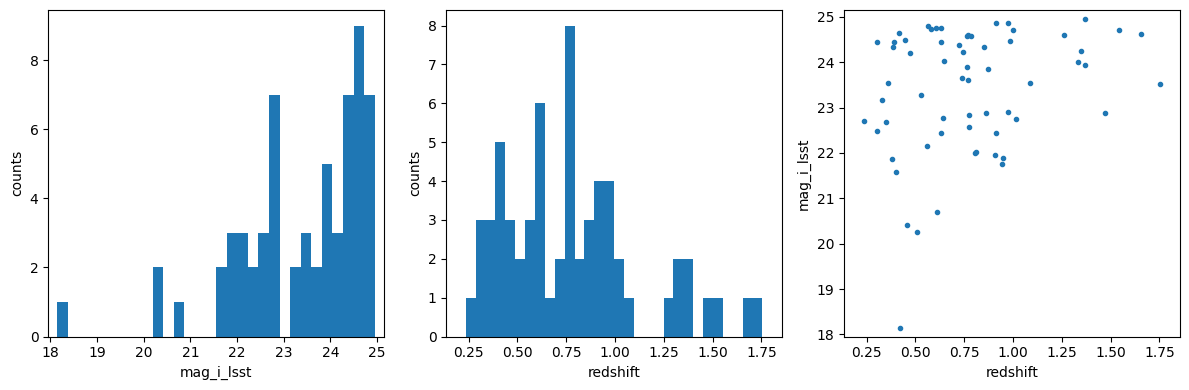

In [31]:
train_goldenspike.plot(mag_name="mag_i_lsst")

<div style="text-align: right" id="photo-z-validation-results">

[back to the top](#notebook-contents)

</div>

## Photo-z Validation Results
    
Validation Results are the outputs of any photo-z algorithm applied on a Validation Set. The format and number of files of this data product are strongly dependent on the algorithm used to create it, so there are no constraints on these two parameters. In the case of multiple files, for instance, if the user includes the results of training procedures (e.g., neural nets weights, decision trees files, or any machine learning by-product) or additional files (SED templates, filter transmission curves, theoretical magnitudes grid, Bayesian priors, etc.), it will be required to put all files together in a single compressed file (.zip or .tar, or .tar.gz) before uploading it to the Photo-z Server.   

### List Validation Results available on PZ Server

In [32]:
pz_server.display_products_list(filters={"product_type": "Validation Results"})

id,internal_name,product_name,product_type,release,uploaded_by,official_product,pz_code,description,created_at
12,12_goldenspike_knn,Goldenspike KNN,Validation Results,None,gschwend,False,KNN,Results of photoz validation using KNN on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.,2023-03-29T19:49:35.652295Z
11,11_goldenspike_flexzboost,Goldenspike FlexZBoost,Validation Results,None,gschwend,False,FlexZBoost,Results of photoz validation using FlexZBoost on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.,2023-03-29T19:48:34.864629Z
10,10_goldenspike_bpz,Goldenspike BPZ,Validation Results,LSST DP0,gschwend,False,BPZ,Results of photoz validation using BPZ on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.,2023-03-29T19:42:04.424990Z


### Display metadata of a given data product of Photo-z Validation Results

In [33]:
pz_server.display_product_metadata("11_goldenspike_flexzboost")

key,value
id,11
release,None
product_type,Validation Results
uploaded_by,gschwend
internal_name,11_goldenspike_flexzboost
product_name,Goldenspike FlexZBoost
official_product,False
pz_code,FlexZBoost
description,Results of photoz validation using FlexZBoost on a mock test set from the example notebook goldenspike.ipynb available in RAIL's repository.
created_at,2023-03-29T19:48:34.864629Z


### Retrieve a given Photo-z Validation Results: download file

This product type is not necessarily (only) tabular data and can be a list of files. The methods `get_product` shown above just return the data to be used on memory and only supports single tabular files. To retrieve Photo-z Validation Results, you must download the data to open locally. 

In [34]:
# pz_server.download_product(11, save_in=".")

<div style="text-align: right" id="photo-z-tables">

[back to the top](#notebook-contents)

</div>

### Photo-z Tables 

The Photo-z Tables are the results of photo-z estimation on photometrics samples. The data format is usually tabular, and might vary according to the phto-z estimation method used. 

The size limit for uploading files on the PZ Server is 200MB, therefore it does not support large Photo-z Tables such as the photo-zs of the LSST Objects catalog. The PZ Server can host small Photo-z Tables or, in case of large datasets, a data product can be registered to contain only the Photo-z Tables' metadata. For these cases, the instructions to find and access the data must be provided in the product's description.   

In [35]:
# pz_server.download_product(<id number or internal name>)

--- 

### Users feedback 

Is something important missing? [Click here to open an issue in the PZ Server library repository on GitHub](https://github.com/linea-it/pz-server-lib/issues). 